<a href="https://colab.research.google.com/github/dajebbar/neural_style_tf/blob/main/neural_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Style Transfer

Here’s a quick demo of how to make your own style transfers.

# Set up our Runtime

Colab needs to know we need to use a GPU-powered machine in order to do style transfers. At the top of this page, click on the Runtime tab, then select Change runtime type. In the modal that pops up, select GPU under the Hardware accelerator options.

We then need to make sure we’re using the latest version of Tensorflow 1, otherwise we get some annoying messages.

In [2]:
#install TF 1.15 to avoid some annoying warning messages
# Restart runtime using 'Runtime' -> 'Restart runtime...'
%tensorflow_version 1.x

import tensorflow as tf
print(tf.__version__)

1.15.2


# Install the neural-style-tf library
We’re going to work with the library called Neural Style. This is a version I’ve customized to do a couple things that I think are helpful for artists.

In the next cell, type `Shift+Return` to run the code

In [3]:
#import some image display tools
from IPython.display import Image, display
#install the library in colab
!git clone https://github.com/dvschultz/neural-style-tf
#change into that directory
%cd neural-style-tf/
#install the library dependencies (it's likely Colab already has them installed, but let's be sure)
!pip install -r requirements.txt
#install the VGG19 pre-trained model
!wget http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat

Cloning into 'neural-style-tf'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 925 (delta 0), reused 0 (delta 0), pack-reused 921
Receiving objects: 100% (925/925), 85.25 MiB | 50.11 MiB/s, done.
Resolving deltas: 100% (467/467), done.
/content/neural-style-tf
--2021-01-27 15:25:31--  http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
Resolving www.vlfeat.org (www.vlfeat.org)... 64.90.48.57
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat [following]
--2021-01-27 15:25:31--  https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
Connecting to www.vlfeat.org (www.vlfeat.org)|64.90.48.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 534904783 (510M)
Saving to: ‘imag

In [4]:
#let's make sure we're in the right folder
!pwd
# we should see "/content/neural-style-tf"

/content/neural-style-tf


# A Basic Style Transfer

To make sure everything is working as expected, let’s run a basic style transfer using the images this library already provides.

First, let’s look at the folder setup. To the left of this text, click on the right pointing caret/arrow. That opens the Table of contents for this notebook. Click on the `Files` tab. This is a view of our "server." click on the arrow/twirley next to `neural-style-tf`. Then do the same for the `image_input` and `styles` folders. These two folders map to the Content (`image_input`) and Style (`styles`) images. I’m going to pick the lion from the content folder and the kandinsky from the styles folder.

There are two arguments required for the basic `neural_style.py` script:


*   `--content_img`: the content image filename plus extension
*   `--style_imgs`: the style image filename plus extension



In [5]:
!python neural_style.py --content_img lion.jpg --style_imgs kandinsky.jpg


---- RENDERING SINGLE IMAGE ----

2021-01-27 15:29:41.483090: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-27 15:29:41.540325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-27 15:29:41.540883: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-01-27 15:29:41.541156: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-27 15:29:41.760043: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-27 15:29:41.896434: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened d

This may take a couple minutes to run, but if you see `Single image elapsed time: [some number]` then it has completed.

Let’s take a look at the content image, the style image, and what it combined to.

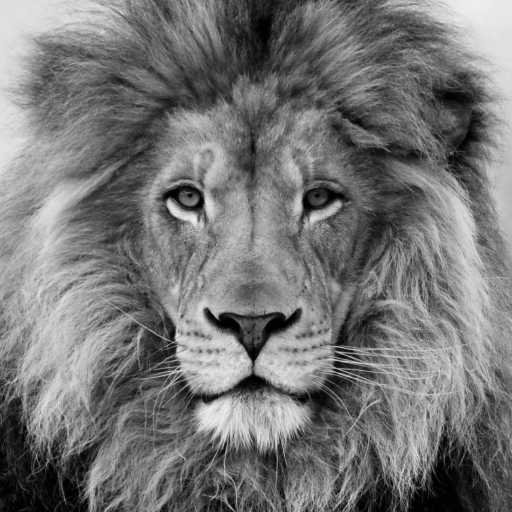

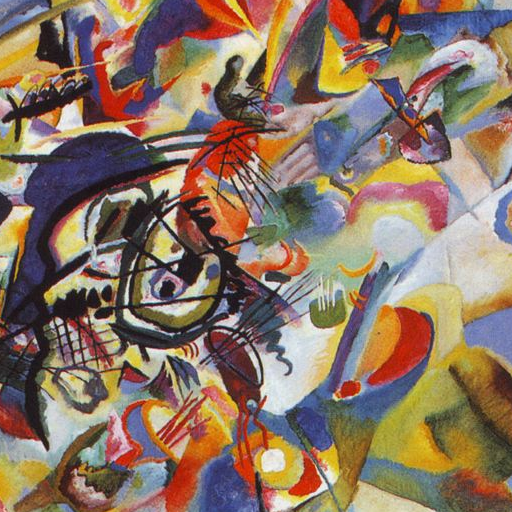

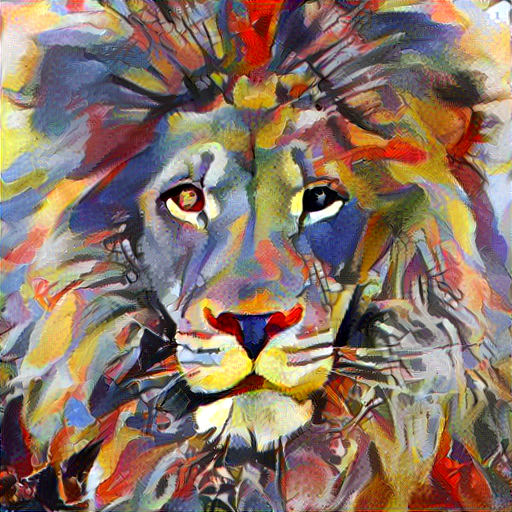

In [6]:
listOfImageNames = ['image_output/1000/content.png',
                    'image_output/1000/style_0.png',
                    'image_output/1000/image_output-1000.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Using just this command you can now create custom style transfers. Upload a content image and style image into the correct folders in the panel to the left. Right click on each folder and choose `Upload`. **Important**: Anytime you restart your runtime, any files you upload (or create!) will be destroyed. Don’t lose your work!

Once your files are uploaded, edit the next cell with the image filenames you uploaded. Once edited, press `Shift+Return` to run the command.

In [7]:
!python neural_style.py --content_img {content filename} --style_imgs {style filename}

usage: neural_style.py [-h] [--verbose] [--img_name IMG_NAME] --style_imgs
                       STYLE_IMGS [STYLE_IMGS ...]
                       [--style_imgs_weights STYLE_IMGS_WEIGHTS [STYLE_IMGS_WEIGHTS ...]]
                       [--content_img CONTENT_IMG]
                       [--style_imgs_dir STYLE_IMGS_DIR]
                       [--content_img_dir CONTENT_IMG_DIR]
                       [--init_img_type {random,content,style}]
                       [--max_size MAX_SIZE] [--content_weight CONTENT_WEIGHT]
                       [--style_weight STYLE_WEIGHT] [--tv_weight TV_WEIGHT]
                       [--temporal_weight TEMPORAL_WEIGHT]
                       [--content_loss_function {1,2,3}]
                       [--content_layers CONTENT_LAYERS [CONTENT_LAYERS ...]]
                       [--style_layers STYLE_LAYERS [STYLE_LAYERS ...]]
                       [--style_scale STYLE_SCALE]
                       [--content_layer_weights CONTENT_LAYER_WEIGHTS [CONTENT_L

Let’s see what you made. If you want to display the image in this notebook, just edit the following cell to point to the correct image path. You can get the image path by right-clicking on the completed image in the `Files` tab and selecting `Copy path`.

Like what you made and want to download it? There are two ways:


1.   Right-click on the image in the `Files` tab, and choose `Download`
2.   Put that file path you grabbed from above into the cell below.



This concludes the basic style transfer demo. To be fair, you could do this with any number of online apps. The **real** power is in all of the options this library has to tweak various parts of the style tranfer effect.

##Style Transfer: Options
Let’s look at a couple options we might want to use immediately.

##Output Size
If you notice, both the Lion image and the Kandinsky image are at least 1000px in size, but your output style transfer is 512px. What if you want a bigger image? This particular library’s default rendering size is 512, but you can override that to any* size you want.

*ok, you can’t really do _any_ size. First, I wouldn’t recommend making the output image larger than either image as it will lead to some pixelation. Second, the larger the image is the longer and more processor intensive the operation will be. In a notebook on Colab, you might not be able to get much larger than 750px. On the P5000 we use on Paperspace you can often get up to 1200 or 1400px depending on the image ratio.

Let’s try something a little larger. And let’s use the lion and kandinsky again. We’ll add the `--max_size` argument, and pass it an integer for the longest dimension (if we want 1200pixels, we use `1200`)

In [10]:
!python neural_style.py --content_img lion.jpg --style_imgs kandinsky.jpg --max_size 1000


---- RENDERING SINGLE IMAGE ----

2021-01-27 16:04:33.222466: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-27 16:04:33.256582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-27 16:04:33.257129: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-01-27 16:04:33.257453: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-27 16:04:33.259040: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-27 16:04:33.260576: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened d

Let’s look at what we made. (Note: this may have just overwritten the previous image.)

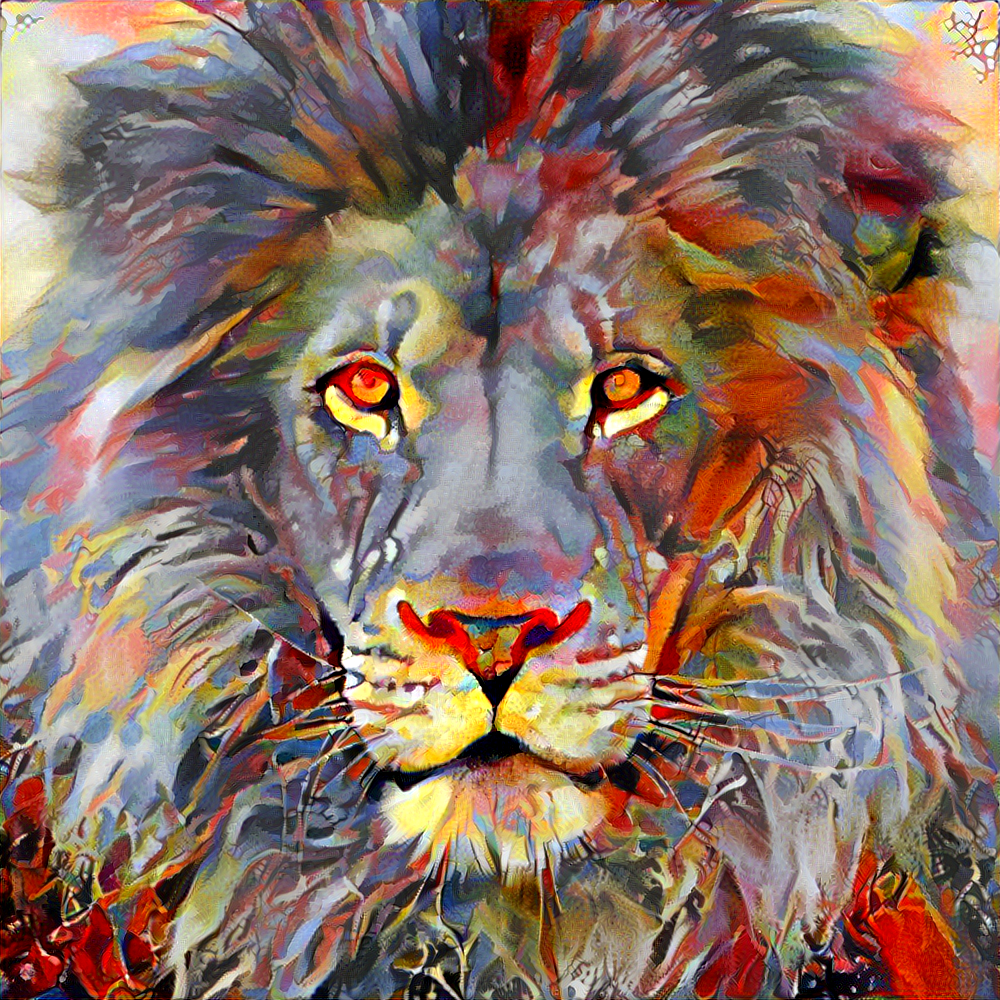

In [12]:
Image(filename='/content/neural-style-tf/image_output/1000/image_output-1000.png')

That’s definitely bigger!

From now on I’m actually going to use a smaller size than the library defaults to. This will help generate the images quicker. But know you can always edit this argument at any time and re-run it.

###Iterations

I compare iterations to "baking time." If you underbake something it comes out mushy and inedible. If you overbake something it comes out hard or burned. What’s the right baking time? Well, it depends on the item you’re baking! And in this case it also depends on you, the baker. Or artist—this metaphor only needs to go so far.

To change the iterations we’ll use the `--max_iterations` argument. It defaults to 1000. Let’s look at a couple different versions to compare them.

In [17]:
!python neural_style.py --content_img lion.jpg --style_imgs seated-nude.jpg --max_size 100


---- RENDERING SINGLE IMAGE ----

2021-01-27 16:23:55.102645: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-27 16:23:55.139434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-27 16:23:55.139998: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-01-27 16:23:55.140284: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-27 16:23:55.141815: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-27 16:23:55.143373: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened d


---- RENDERING SINGLE IMAGE ----

2021-01-27 16:31:12.717254: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-27 16:31:12.752860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-27 16:31:12.753486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-01-27 16:31:12.753761: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-27 16:31:12.755241: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-27 16:31:12.756699: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened d

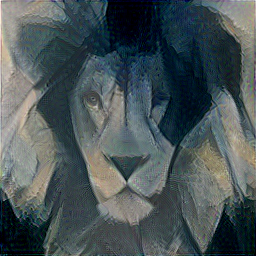

In [23]:
!python neural_style.py --content_img lion.jpg --style_imgs seated-nude.jpg --max_size 256 --max_iterations 500
Image(filename='/content/neural-style-tf/image_output/500/image_output-500.png')


---- RENDERING SINGLE IMAGE ----

2021-01-27 16:31:50.283564: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-27 16:31:50.317203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-27 16:31:50.317761: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-01-27 16:31:50.318044: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-27 16:31:50.319542: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-27 16:31:50.321029: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened d

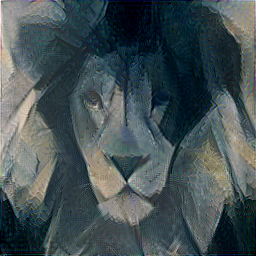

In [24]:
!python neural_style.py --content_img lion.jpg --style_imgs seated-nude.jpg --max_size 256 --max_iterations 800
Image(filename='/content/neural-style-tf/image_output/800/image_output-800.png')

You may have noticed the more iterations, the longer it takes to generate the image.

Let’s look at the images side by side.


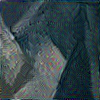

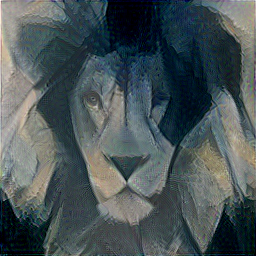

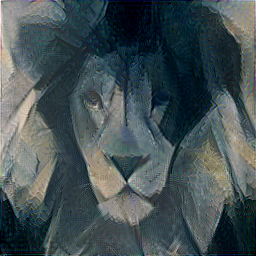

In [25]:
listOfImageNames = ['image_output/100/image_output-100.png',
                    'image_output/500/image_output-500.png',
                    'image_output/800/image_output-800.png',]

for imageName in listOfImageNames:
    display(Image(filename=imageName))

It’s not always easy to tell the difference and it can depend a lot on the images you’re using, but I personally find 1000 iterations to be the top of what I find useful. I usually use 400 or 500 most times and like that setting—it may be different for you and your images. It’s worth playing with.

###Folder Naming
You’ll notice the folders come with default names. For now that’s fine, but as you do more and more of these it will get really confusing to find the image you want to download. I try to name my folders descriptively so that I can also redo an image if I like it.

For this, we’ll use the `--img_output_dir` argument. (Note that in my version of this library it will use this for both the name of the folder and the name of the output image.)

**Important:** if you use the same folder name twice it will override the previous generated image. Make sure you edit this every time you make a new image.


---- RENDERING SINGLE IMAGE ----

2021-01-27 16:34:40.209002: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-27 16:34:40.245904: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-27 16:34:40.246503: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-01-27 16:34:40.246799: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-27 16:34:40.248491: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-27 16:34:40.250000: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened d

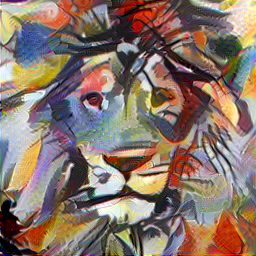

In [26]:
!python neural_style.py --content_img lion.jpg --style_imgs kandinsky.jpg --max_size 256 --max_iterations 500 --img_output_dir ./lion-kandinksy-256sz-500iter
Image(filename='/content/neural-style-tf/lion-kandinksy-256sz-500iter/500/lion-kandinksy-256sz-500iter-500.png')

###Multiple Style Images
OK, let’s start having fun and get into some advanced style transfer things. What if we want _multiple_ styles? Almost like a collage or something. In all those online apps, you really only get one style. But we can do two, three, four! styles in this library by passing in multiple file names using the `--style_imgs` argument.

whenever you use multiple style images, you also need to add and edit the `--style_imgs_weights` argument. This argument allows you to assign how much of each style image comes into the image (it should always add up to 1)


---- RENDERING SINGLE IMAGE ----

2021-01-27 16:35:42.837082: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-27 16:35:42.873532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-27 16:35:42.874098: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-01-27 16:35:42.874381: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-27 16:35:42.875872: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-27 16:35:42.877311: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened d

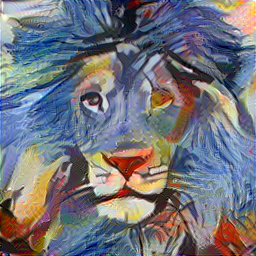

In [27]:
#evenly weighted style images
!python neural_style.py --content_img lion.jpg --style_imgs kandinsky.jpg starry-night.jpg --max_size 256 --max_iterations 500 --style_imgs_weights 0.5 0.5 --img_output_dir ./lion-kandinksy+starrynight-256sz-500iter
Image(filename='/content/neural-style-tf/lion-kandinksy+starrynight-256sz-500iter/500/lion-kandinksy+starrynight-256sz-500iter-500.png')


---- RENDERING SINGLE IMAGE ----

2021-01-27 16:36:27.809286: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-27 16:36:27.845036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-27 16:36:27.845602: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-01-27 16:36:27.845876: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-27 16:36:27.847298: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-27 16:36:27.848724: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened d

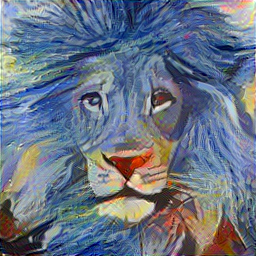

In [28]:
#this version weights toward the starry night image
!python neural_style.py --content_img lion.jpg --style_imgs kandinsky.jpg starry-night.jpg --max_size 256 --max_iterations 500 --style_imgs_weights 0.25 0.75 --img_output_dir ./lion-kandinksy+starrynight-256sz-500iter-w.25-.75
Image(filename='/content/neural-style-tf/lion-kandinksy+starrynight-256sz-500iter-w.25-.75/500/lion-kandinksy+starrynight-256sz-500iter-w.25-.75-500.png')

##Style Scale
One of my favorite options is to use the `-style_scale` argument.

When the default style transfer script is run it crops the style image to the same size as the content image and uses the exact same scale. Sometimes this means the style isn’t represented well and the detail of the style texture doesn’t match our expectations. But we can scale the style image to try to retain some of those textural elements.

Here we’ll look at a couple different scales of the Kandinksky image.

In [29]:
#style_scale = 1.0 (default)
!python neural_style.py --content_img lion.jpg --style_imgs kandinsky.jpg --max_size 256 --max_iterations 500 --style_scale 1.0 --img_output_dir ./lion-kandinksy-256sz-500iter-scale1.0
#style_scale = 0.75
!python neural_style.py --content_img lion.jpg --style_imgs kandinsky.jpg --max_size 256 --max_iterations 500 --style_scale .75 --img_output_dir ./lion-kandinksy-256sz-500iter-scale0.75
#style_scale = 0.5
!python neural_style.py --content_img lion.jpg --style_imgs kandinsky.jpg --max_size 256 --max_iterations 500 --style_scale 0.5 --img_output_dir ./lion-kandinksy-256sz-500iter-scale0.5
#style_scale = .25
!python neural_style.py --content_img lion.jpg --style_imgs kandinsky.jpg --max_size 256 --max_iterations 500 --style_scale .25 --img_output_dir ./lion-kandinksy-256sz-500iter-scale0.25


---- RENDERING SINGLE IMAGE ----

2021-01-27 16:37:11.598553: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-01-27 16:37:11.634119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-27 16:37:11.634716: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-01-27 16:37:11.635002: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-01-27 16:37:11.636472: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-01-27 16:37:11.637864: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened d

Let’s look at all of these next to each other.

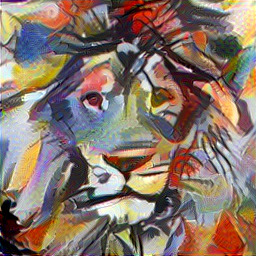

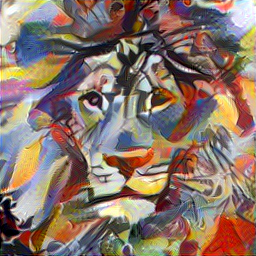

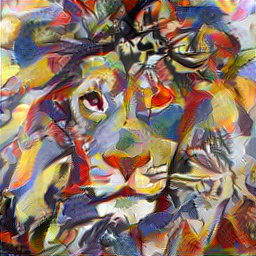

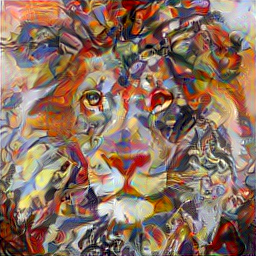

In [30]:
listOfImageNames = ['/content/neural-style-tf/lion-kandinksy-256sz-500iter-scale1.0/500/lion-kandinksy-256sz-500iter-scale1.0-500.png',
                    '/content/neural-style-tf/lion-kandinksy-256sz-500iter-scale0.75/500/lion-kandinksy-256sz-500iter-scale0.75-500.png',
                    '/content/neural-style-tf/lion-kandinksy-256sz-500iter-scale0.5/500/lion-kandinksy-256sz-500iter-scale0.5-500.png',
                    '/content/neural-style-tf/lion-kandinksy-256sz-500iter-scale0.25/500/lion-kandinksy-256sz-500iter-scale0.25-500.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

As you can see, the smaller the scale the more details included in the final image. It’s another parameter that comes down to personal preference.

You can also look at what the scale image looks like when passed to the style transfer script by looking at the `style_0.png` image (in the case of multiple style images, each will be numberd).

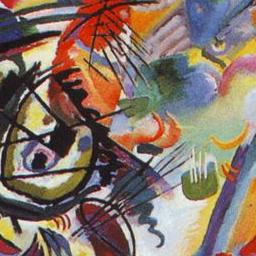

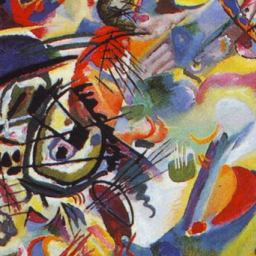

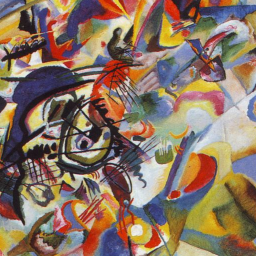

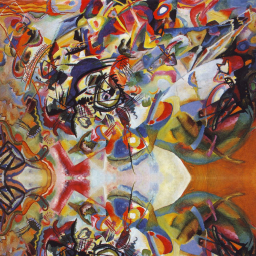

In [31]:
listOfImageNames = ['/content/neural-style-tf/lion-kandinksy-256sz-500iter-scale1.0/500/style_0.png',
                    '/content/neural-style-tf/lion-kandinksy-256sz-500iter-scale0.75/500/style_0.png',
                    '/content/neural-style-tf/lion-kandinksy-256sz-500iter-scale0.5/500/style_0.png',
                    '/content/neural-style-tf/lion-kandinksy-256sz-500iter-scale0.25/500/style_0.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))